# Text classification: Understanding the Customer's Feedback

---
In this notebook, we will perform Sentiment Analysis on IMDB movies reviews. Sentiment Analysis is the art of extracting people's opinion from digital text. We will use a regression model from Scikit-Learn able to predict the sentiment given a movie review.



##Loading the data

### Importing the libraries and necessary dictionaries

In [21]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the dataset in our directory

In [23]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

--2024-01-23 04:23:08--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   193MB/s    in 0.3s    

2024-01-23 04:23:09 (193 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 63M
drwxr-xr-x 1 root root 4.0K Jan 23 02:20 .
drwxr-xr-x 1 root root 4.0K Jan 23 02:13 ..
drwxr-xr-x 4 root root 4.0K Jan 19 14:19 .config
-rw-r--r-- 1 root root  63M Jan 23 04:23 movie_data.csv
drwxr-xr-x 1 root root 4.0K Jan 19 14:20 sample_data


###Reading the dataset file and getting info on it


In [24]:
# path to IMDB dataseet
path='/content/movie_data.csv'

# read file (dataset) into our program using pandas
data= pd.read_csv(path)


# display first 5 rows
data.head(5)


,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


Getting info on our dataset

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


Check if dataset is balanced (number of positive sentiment = number of negative sentiment) by plotting the different classes

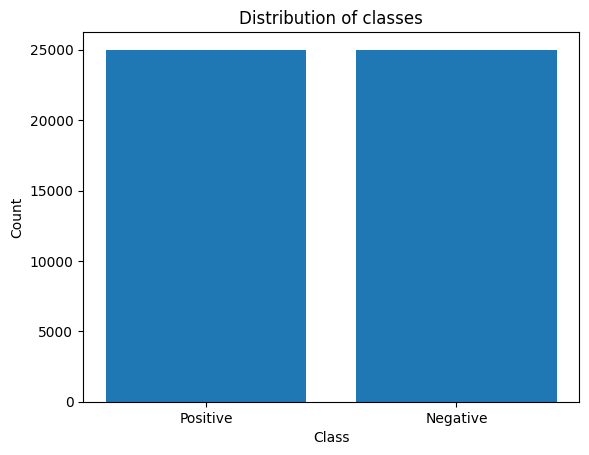

In [26]:
number_of_dataset= len(data)
half_number_of_dataset = number_of_dataset/2

count=[(len(data[data['sentiment']==1])), (len(data[data['sentiment']==0])) ]
lables=['Positive', 'Negative']


plt.bar(lables, count )
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of classes')
plt.show()



## Text cleaning

In [27]:
print(data.review[10])

I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the hell of this movi

In [40]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# Load English stopwords
english_stopwords = stopwords.words('english')

# Initialize PorterStemmer for word stemming
stemmer = PorterStemmer()

# Define cleaning function
def clean_review(text):
    # Tokenize the input text into individual words
    text_tokens = word_tokenize(text)

    # Remove special characters and numbers, replace with a space
    text_tokens = [re.sub('[^A-Za-z]', ' ', word) for word in text_tokens]

    # Remove leading and trailing spaces from each word
    text_tokens = [word.strip() for word in text_tokens]

    # Remove extra spaces, replace consecutive spaces with a single space
    text_tokens = [word.replace('  ', ' ') for word in text_tokens]

    # Lemmatize words and remove stop words
    text_tokens = [stemmer.stem(word) for word in text_tokens if word not in english_stopwords]

    # Convert words to lowercase
    text_tokens = [word.lower() for word in text_tokens if word.strip()]

    # Join the cleaned words back into a single string
    text = ' '.join([word for word in text_tokens])

    # Return the cleaned text
    return text

In [43]:
# testing the cleaning method
print(clean_review("Hi im Reema 01 Alharbi i hope you enjoy 12$^ "))

hi im reema alharbi hope enjoy


Try it out on an instance of the dataset then on the entire dataset.

In [30]:
print(data['review'].head(3).apply(clean_review))

0    i went saw movi last night coax friend mine i ...
1    actor turn director bill paxton follow promis ...
2    as recreat golfer knowledg sport histori i ple...
Name: review, dtype: object


And now clean the entire dataset reviews

In [31]:
# apply to all dataset
data['clean_review'] = data['review'].apply(clean_review)
data.head()

,review,sentiment,clean_review
0,I went and saw this movie last night after bei...,1,i went saw movi last night coax friend mine i ...
1,Actor turned director Bill Paxton follows up h...,1,actor turn director bill paxton follow promis ...
2,As a recreational golfer with some knowledge o...,1,as recreat golfer knowledg sport histori i ple...
3,"I saw this film in a sneak preview, and it is ...",1,i saw film sneak preview delight the cinematog...
4,Bill Paxton has taken the true story of the 19...,1,bill paxton taken true stori us golf open made...


In [13]:
data['sentiment'].unique()

array([1, 0])

## Split dataset for training and testing


 Split your data to get x_train, x_test, y_train and y_test.

In [14]:
from sklearn.model_selection import train_test_split

X = data['clean_review']
y = data['sentiment']

# Split data into 50% training & 50% test

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=40, shuffle=True)
# Use a random state of 42 for example to ensure having the same split


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(45000,) (45000,)
(5000,) (5000,)


## Feature extraction with Bag of Words


In this section, apply the Bag of Words method to learn the vocabulary of your text and with it transform your training input data.

In [44]:
# Import the CountVectorizer module
from sklearn.feature_extraction.text import CountVectorizer

# Define a CountVectorizer with binary=True (to use binary encoding) and max_features=10000 (to limit the vocabulary size)
vectorizer = CountVectorizer(binary=True, max_features=10000)

# Learn the vocabulary of all tokens in our training dataset
vectorizer.fit(x_train)

# Transform x_train to bag of words representation
x_train_bow = vectorizer.transform(x_train)

# Transform x_test to bag of words representation
x_test_bow = vectorizer.transform(x_test)

# Print the shape of the transformed training data and its corresponding labels
print(x_train_bow.shape, y_train.shape)

# Print the shape of the transformed test data and its corresponding labels
print(x_test_bow.shape, y_test.shape)

(45000, 10000) (45000,)
(5000, 10000) (5000,)


## Classification

In [17]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
model=LogisticRegression()

# train the classifier on the training data
model.fit(x_train_bow, y_train)

# get the mean accuracy on the training data
acc_train=model.score(x_train_bow, y_train)

print('Training Accuracy:', acc_train)

Training Accuracy: 0.9610666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question 8:**  Evaluating the performance of your model through its accuracy score

In [18]:
# Evaluate model with test data
acc_test=model.score(x_test_bow, y_test)
print('Testing Accuracy:', acc_test)


Testing Accuracy: 0.8802


## Using the model to predict!


In [45]:
# Define the predict function
def predict(model, vectorizer, review):
    # Clean the review using the clean_review function
    review = clean_review(review)

    # Transform the cleaned review to bag of words representation
    review_bow = vectorizer.transform([review])

    # Use the model to predict the sentiment of the review
    result = model.predict(review_bow)[0]

    # Check the predicted result and return the corresponding label
    if result == 1:
        return "It's a positive comment"
    elif result == 0:
        return "It's a negative comment"
    else:
        return result



Try it out on an example

In [46]:
review = "Terrible product. It arrived damaged and didn not work at all09. Complete waste of money.!"
predict(model, vectorizer, review)

"It's a negative comment"

In [47]:
review = 'The movie was Great!'
predict(model, vectorizer, review)

"It's a positive comment"